In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Percobaan 1 - Cropping Image

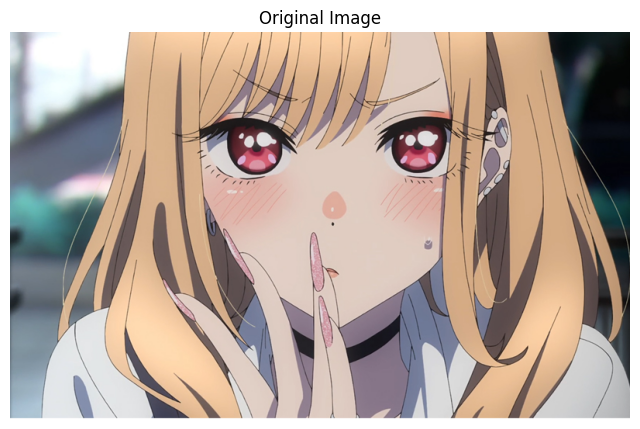

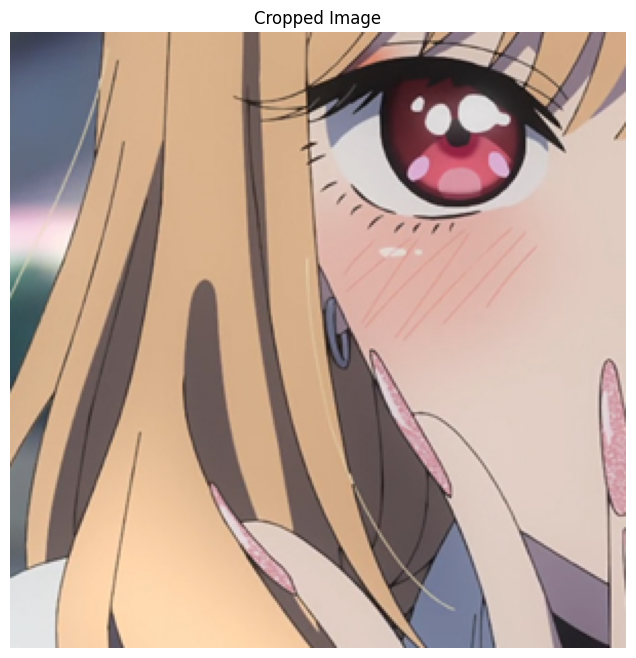

In [3]:
img = cv2.imread('marin.jpg')


x1, y1 = 100, 100 
x2, y2 = 400, 400 
crop_img = img[y1:y2, x1:x2]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

# Percobaan 2 - Citra Negative

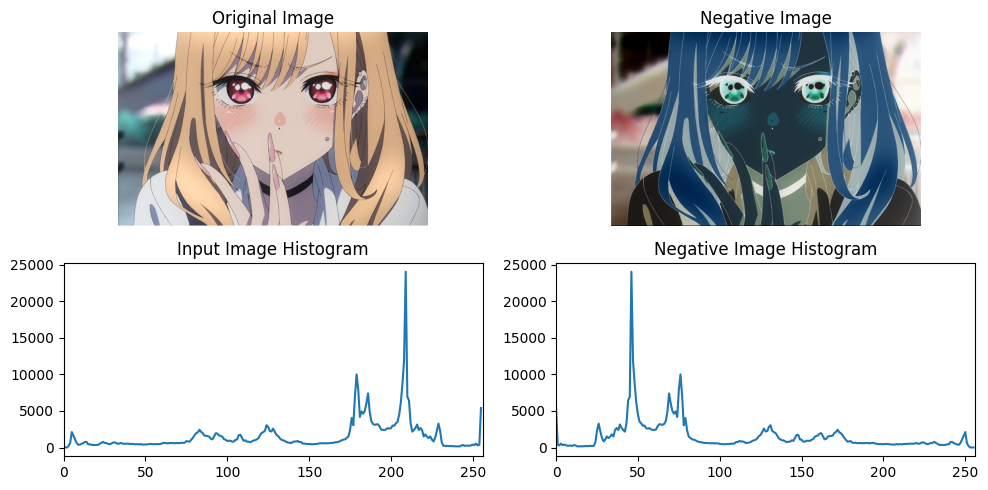

In [4]:
# Load image
img = cv2.imread('marin.jpg')

neg_img = 255 - img

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
neg_gray_img = 255 - gray_img

hist_img, bins_img = np.histogram(gray_img.flatten(), 256, [0, 256])
hist_neg_img, bins_neg_img = np.histogram(neg_gray_img.flatten(), 256, [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(222)
plt.imshow(cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB))
plt.title('Negative Image')
plt.axis('off')
plt.subplot(223)
plt.plot(hist_img)
plt.title('Input Image Histogram')
plt.xlim([0, 256])
plt.subplot(224)
plt.plot(hist_neg_img)
plt.title('Negative Image Histogram')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

# Brightness Grayscale

In [5]:
img = cv2.imread('marin.jpg')
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]
img_type = img.dtype

In [6]:
img_brightness = np.zeros(img.shape, dtype=np.uint8)

In [7]:
def brighter(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray += nilai
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            img_brightness[y][x] = (gray, gray, gray)

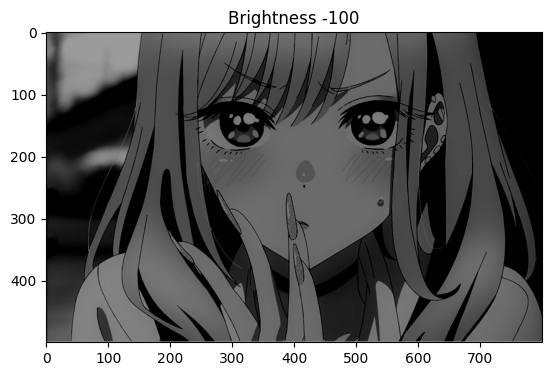

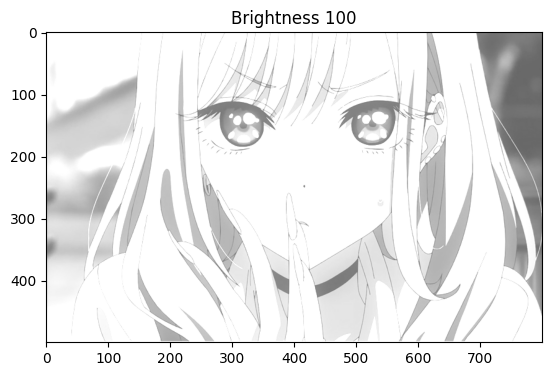

In [8]:
brighter(-100)
plt.imshow(img_brightness)
plt.title("Brightness -100")
plt.show()

brighter(100)
plt.imshow(img_brightness)
plt.title("Brightness 100")
plt.show()

# Brightness RGB

In [9]:
img_rgbbrightness = np.zeros(img.shape, dtype=np.uint8)

In [10]:
def rgbbrighter(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            red += nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            green = img[y][x][1]
            green += nilai
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            blue = img[y][x][2]
            blue += nilai
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_rgbbrightness[y][x] = (red, green, blue)

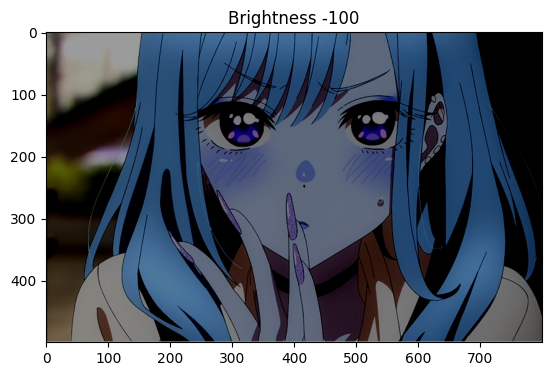

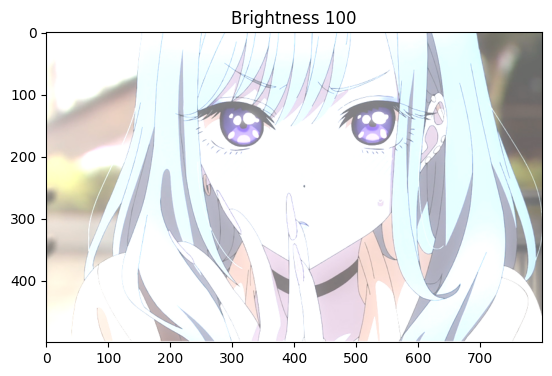

In [11]:
rgbbrighter(-100)
plt.imshow(img_rgbbrightness)
plt.title("Brightness -100")
plt.show()

rgbbrighter(100)
plt.imshow(img_rgbbrightness)
plt.title("Brightness 100")
plt.show()

# contrass

In [12]:
img_contrass = np.zeros(img.shape, dtype=np.uint8)

In [13]:
def contrass(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray *= nilai
            if gray > 255:
                gray = 255
            img_contrass[y][x] = (gray, gray, gray)

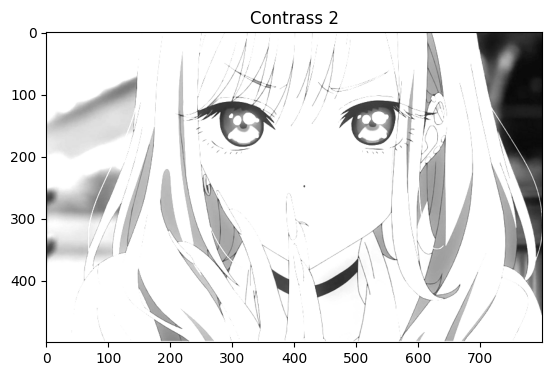

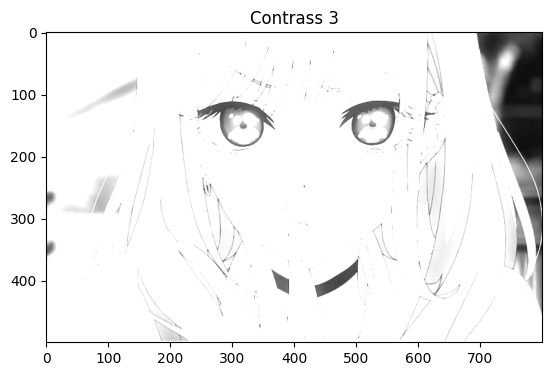

In [14]:
contrass(2)
plt.imshow(img_contrass)
plt.title("Contrass 2")
plt.show()

contrass(3)
plt.imshow(img_contrass)
plt.title("Contrass 3")
plt.show()

# Contrass Autolevel

In [15]:
img_autocontrass = np.zeros(img.shape, dtype=np.uint8)


In [16]:
def autocontrass():
    xmax = 300
    xmin = 0
    d = 0
    # Mendapatkan nilai d, dimana nilai d ini akan berpengaruh pada hitungan
    # untuk mendapatkan tingkat kontras
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            if gray < xmax:
                xmax = gray
            if gray > xmin:
                xmin = gray
    d = xmin-xmax
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray = int(float(255/d) * (gray-xmax))
            img_autocontrass[y][x] = (gray, gray, gray)

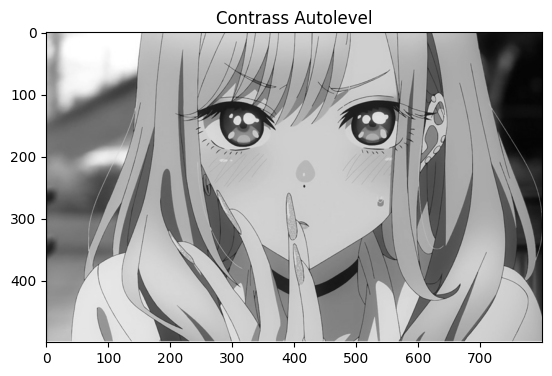

In [17]:
autocontrass()
plt.imshow(img_autocontrass)
plt.title("Contrass Autolevel")
plt.show()